# Titanic Data Analysis – Rhombix Technologies Internship Project

## Introduction
This project includes two parts:  
1. Data Collection and Cleaning  
2. Exploratory Data Analysis (EDA)

The dataset used is the Titanic dataset from the Seaborn library.  
The goal is to explore survival patterns based on passenger demographics and travel class.


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset("titanic")

# Show first 5 rows
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
# Dataset shape
print(df.shape)

# Info & data types
print(df.info())

# Summary statistics
print(df.describe())


(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parc

In [25]:
# Fill missing values
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop deck column
df.drop(columns=['deck'], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize column names
df.columns = df.columns.str.lower()


/tmp/ipython-input-2767415357.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
/tmp/ipython-input-2767415357.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

## Data Cleaning Summary
- Filled missing values in the *age* and *embarked* columns  
- Dropped the *deck* column due to excessive missing values  
- Removed duplicate records  
- Standardized column names


In [26]:
print("Total passengers:", df.shape[0])
print("Number of survivors:", df['survived'].sum())
print("Survival rate:", round(df['survived'].mean()*100, 2), "%")
print(df['class'].value_counts())


Total passengers: 780
Number of survivors: 322
Survival rate: 41.28 %
class
Third     404
First     212
Second    164
Name: count, dtype: int64


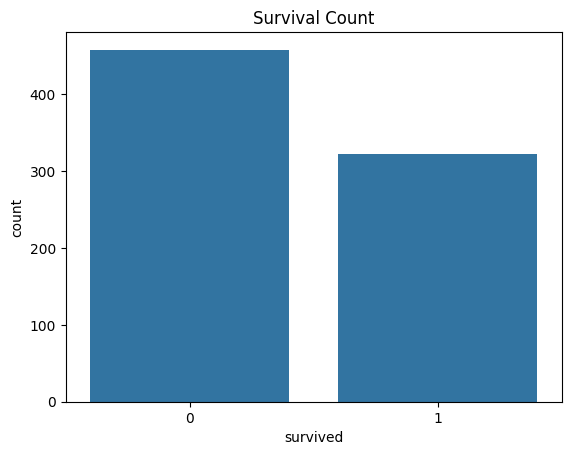

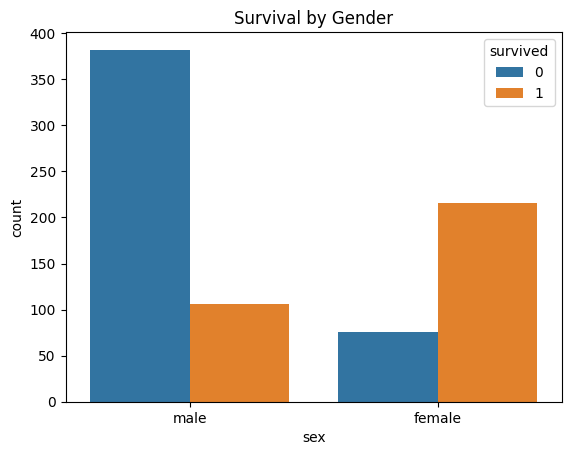

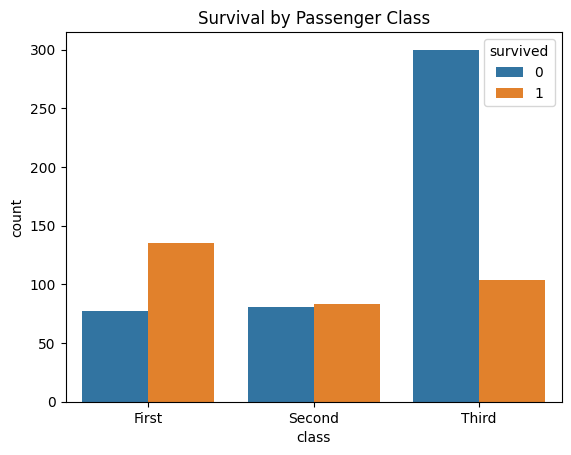

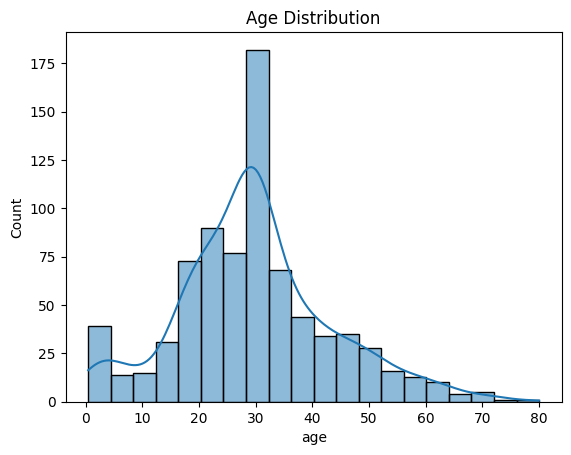

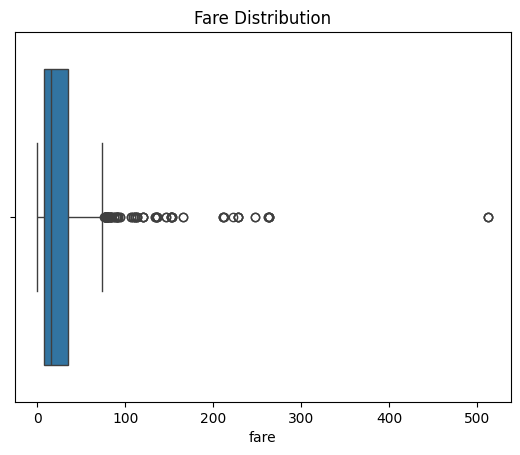

In [27]:
# Survival Count
sns.countplot(data=df, x='survived')
plt.title('Survival Count')
plt.show()

# Survival by Gender
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival by Gender')
plt.show()

# Survival by Class
sns.countplot(data=df, x='class', hue='survived')
plt.title('Survival by Passenger Class')
plt.show()

# Age Distribution
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Fare Distribution
sns.boxplot(data=df, x='fare')
plt.title('Fare Distribution')
plt.show()


## EDA Summary
Key observations:
- Female passengers had a higher survival rate  
- First-class passengers survived more often than third-class  
- Most passengers were between ages 20–40  
- Higher ticket fares were associated with better survival odds
